## Machine Learning Assignment 1
#### Section 1 Ji Hyun Kim

##### fundamentals.csv

Data: This dataset is a playground for fundamental and technical analysis. It is said that 30% of traffic on stocks is already generated by machines, can trading be fully automated? If not, there is still a lot to learn from historical data.
fundamentals.csv: metrics extracted from annual SEC 10K fillings (2012-2016), should be enough to derive most of popular fundamental indicators. The data has 1781 observations and 78 attributes.

In [1]:
# Load Python Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import kstest

In [3]:
# Import the dataset
fundamentals_df = pd.read_csv("fundamentals.csv", index_col=0)

# Print the first 5 rows of the dataset
fundamentals_df.head()

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [4]:
# Check if there's any null values
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1781 entries, 0 to 1780
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1781 non-null   object 
 1   Period Ending                                        1781 non-null   object 
 2   Accounts Payable                                     1781 non-null   float64
 3   Accounts Receivable                                  1781 non-null   float64
 4   Add'l income/expense items                           1781 non-null   float64
 5   After Tax ROE                                        1781 non-null   float64
 6   Capital Expenditures                                 1781 non-null   float64
 7   Capital Surplus                                      1781 non-null   float64
 8   Cash Ratio                                           1482 non-null  

In [5]:
# Remove NAs and check again

fundamentals_df=fundamentals_df.dropna()

fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1779
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1299 non-null   object 
 1   Period Ending                                        1299 non-null   object 
 2   Accounts Payable                                     1299 non-null   float64
 3   Accounts Receivable                                  1299 non-null   float64
 4   Add'l income/expense items                           1299 non-null   float64
 5   After Tax ROE                                        1299 non-null   float64
 6   Capital Expenditures                                 1299 non-null   float64
 7   Capital Surplus                                      1299 non-null   float64
 8   Cash Ratio                                           1299 non-null  

All NAs dropped and every column has 1299 nun-null values.

#### 1. Data Exploration and Visualization: Explore the “fundamentals.csv”. Include any other plots you find interesting. (10 pts)

Start with histograms to observe distribution of features

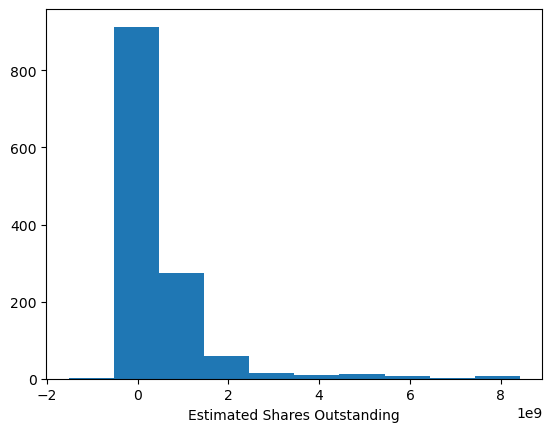

In [54]:
#Histogram of Estimated Shares Outstanding
plt.hist(fundamentals_df['Estimated Shares Outstanding'])
plt.xlabel('Estimated Shares Outstanding')
plt.show()

The majority of data points fall into the first bin(around 0), as indicated by the tallest bar. This suggests that most of the companies in this dataset have a number of Estimated Shares Outstanding within this range. Also beyond the first two bins, the distribution is quite sparse.

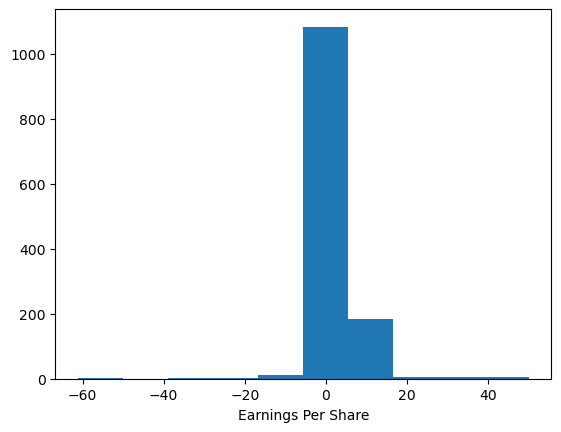

In [55]:
#Histogram of Earnings Per Share 
plt.hist(fundamentals_df['Earnings Per Share'])
plt.xlabel('Earnings Per Share')
plt.show()

The histogram shows a high concentration of data in the bin that includes zero and this indicates that a large number of companies have earnings per share around zero.

The range of Earnings Per Share is broad, but the majority of data points are clustered around zero, suggesting that most companies in this dataset have low Earnings Per Share.



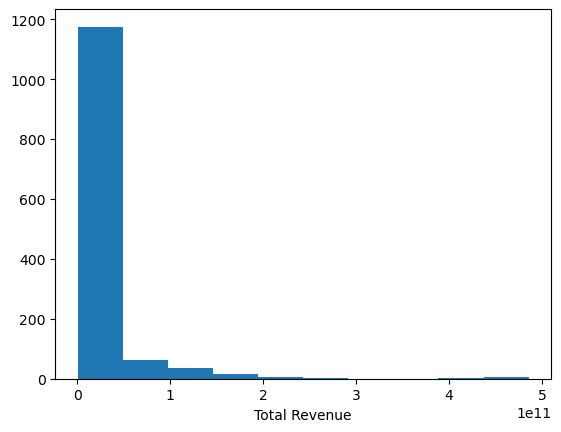

In [7]:
#Histogram of Total Revenue
plt.hist(fundamentals_df['Total Revenue'])
plt.xlabel('Total Revenue')
plt.show()

The tallest bar is at the far left, indicating that the vast majority of entities have revenues in the lowest range. There is a rapid decline in frequency as revenue increases, with very few entities reaching the highest revenue bins. In conclusion, the data suggests that high-revenue entities are rare within this dataset, and most entities are clustered within the lower revenue range.

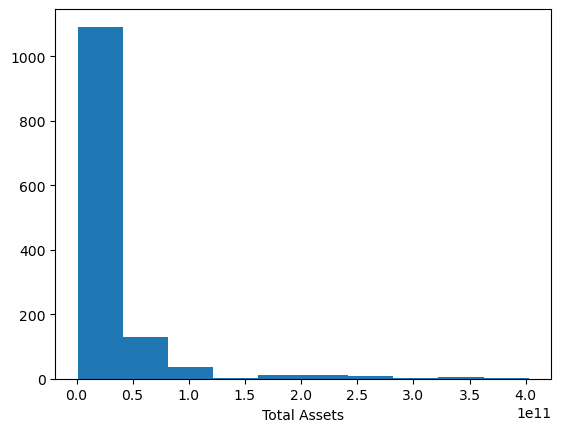

In [8]:
#Histogram of Total Assets
plt.hist(fundamentals_df['Total Assets'])
plt.xlabel('Total Assets')
plt.show()

The distribution of Total Assets is very similar to that of Total Revenue.

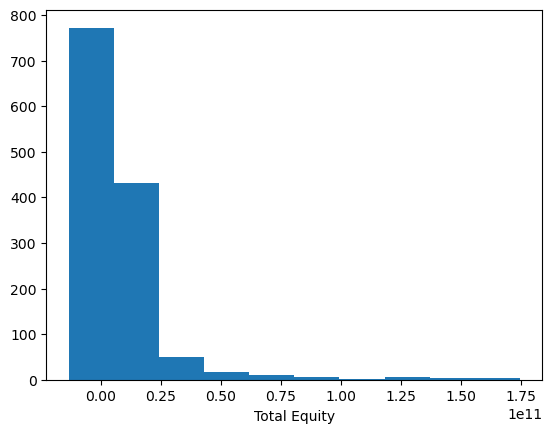

In [9]:
#Histogram of Total Equity
plt.hist(fundamentals_df['Total Equity'])
plt.xlabel('Total Equity')
plt.show()

Same as Total Assets, the distribution of Total Equity is very similar to that of Total Revenue.

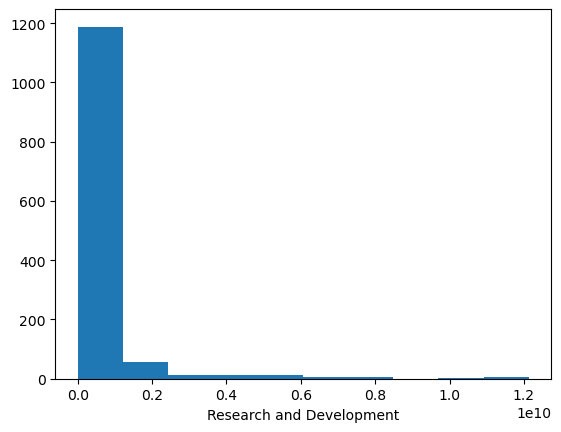

In [10]:
#Histogram of Research and Development
plt.hist(fundamentals_df['Research and Development'])
plt.xlabel('Research and Development')
plt.show()

The distribution is highly skewed to the right, meaning that while most entities spend relatively little on R&D, there are a few that spend significantly more.

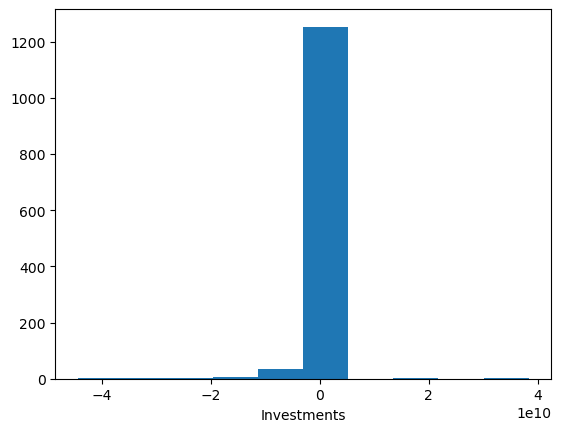

In [11]:
#Histogram of Investments
plt.hist(fundamentals_df['Investments'])
plt.xlabel('Investments')
plt.show()

The distribution is highly centralized, with almost all entities concentrated in the range close to zero.

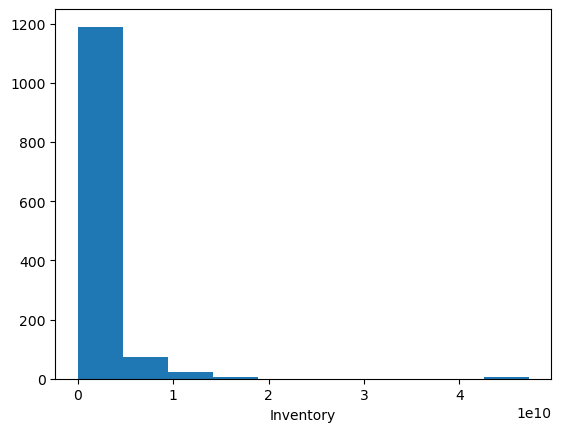

In [12]:
#Histogram of Inventory
plt.hist(fundamentals_df['Inventory'])
plt.xlabel('Inventory')
plt.show()

Like the histogram of Research and Development, the distribution is heavily right-skewed, with the bulk of the entities clustered at the lower end of the inventory scale.

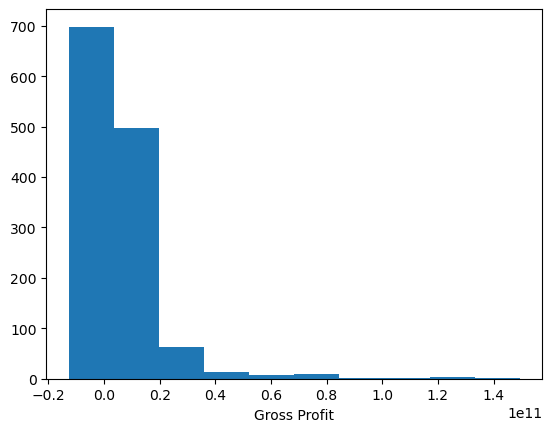

In [13]:
#Histogram of Gross Profit
plt.hist(fundamentals_df['Gross Profit'])
plt.xlabel('Gross Profit')
plt.show()

The distribution is right-skewed, with most entities recording lower Gross Profit figures, and fewer entities achieving higher Gross Profit levels.

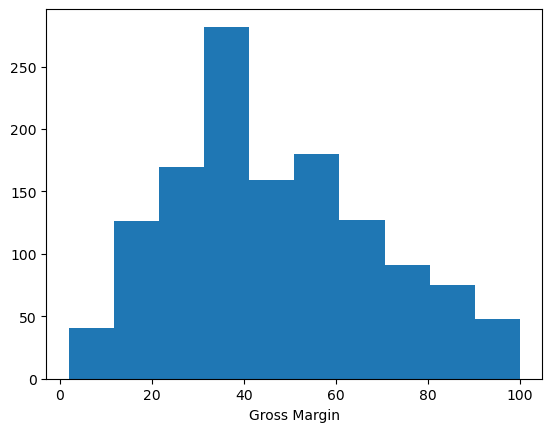

In [14]:
#Histogram of Gross Profit and Gross Margin
plt.hist(fundamentals_df['Gross Margin'])
plt.xlabel('Gross Margin')
plt.show()

The Gross Margin ranges from 0 to 100. The distribution has a somewhat central tendency with a slight right skew, suggesting that while there are entities across a broad range of Gross Margin, more entities tend to have a moderate to high Gross Margin than very low or very high.

Now plot scatterplots to see relationships between two variables. Since we're going to create a model to predict Estimated Shares Outstanding, it will be served as y-axis in all scatterplots.

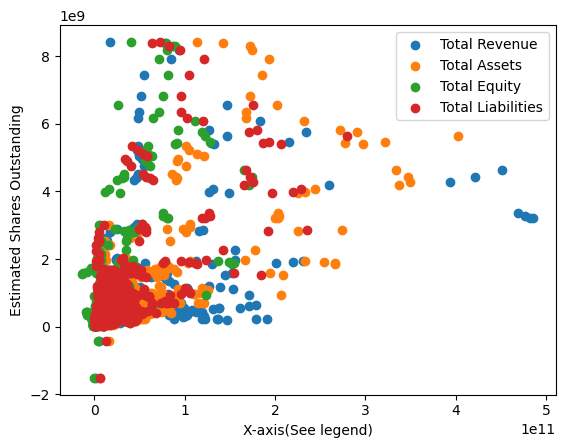

In [15]:
# Plotting scatterplots of Total Revenue/Assets/Equity/Liabilities verus Estimated Shares Outstanding

plt.scatter(fundamentals_df['Total Revenue'], fundamentals_df['Estimated Shares Outstanding'], label = 'Total Revenue')
plt.scatter(fundamentals_df['Total Assets'], fundamentals_df['Estimated Shares Outstanding'], label = 'Total Assets')
plt.scatter(fundamentals_df['Total Equity'], fundamentals_df['Estimated Shares Outstanding'], label = 'Total Equity')
plt.scatter(fundamentals_df['Total Liabilities'], fundamentals_df['Estimated Shares Outstanding'], label = 'Total Liabilities')

# Add a legend to the plot
plt.legend()

# Add axis names to the plot
plt.xlabel('X-axis(See legend)')
plt.ylabel('Estimated Shares Outstanding')

plt.show()

The shapes of the scatterplots for the four variables are almost identical, and we can observe positive relationships between Estimated Shares Outstanding and all four features.

However, as we move right on the x-axis, the number of observations decreases, and the data points become more spread out. This suggest that fewer companies have very high revenue, assets, equity, and liabilities.

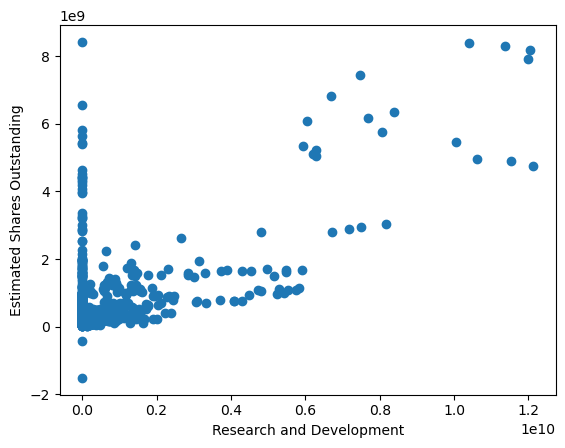

In [16]:
# Plotting scatterplot of Research and Development verus Estimated Shares Outstanding
plt.scatter(fundamentals_df['Research and Development'], fundamentals_df['Estimated Shares Outstanding'])
plt.xlabel('Research and Development')
plt.ylabel('Estimated Shares Outstanding')
plt.show()

There are no clear patterns indicating a direct correlation between the amount spent on R&D and the number of estimated shares outstanding. 

There is a clustering of data points at the lower end of the Research and Development axis, indicating that a large number of observations have low R&D values.

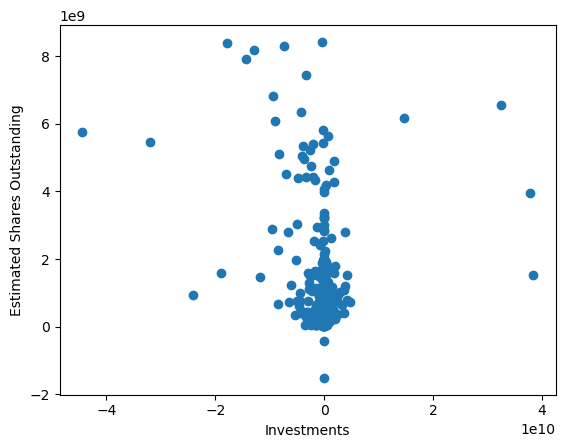

In [17]:
# Plotting scatterplot of Investments verus Estimated Shares Outstanding
plt.scatter(fundamentals_df['Investments'], fundamentals_df['Estimated Shares Outstanding'])
plt.xlabel('Investments')
plt.ylabel('Estimated Shares Outstanding')
plt.show()

The data points are centered around (0,0), and the vertical spread in the middle indicates that there's a wide range of Estimated Shares Outstanding for investments close to zero.

No clear linear pattern that suggests a strong positive or negative correlation between investments and Estimated Shares Outstanding is observed. But the vertical spread in the middle indicates that there's a wide range of Estimated Shares Outstanding for companies with investments close to 0. This implies companies with minimal investment activity can have very different scales in terms of share quantities.




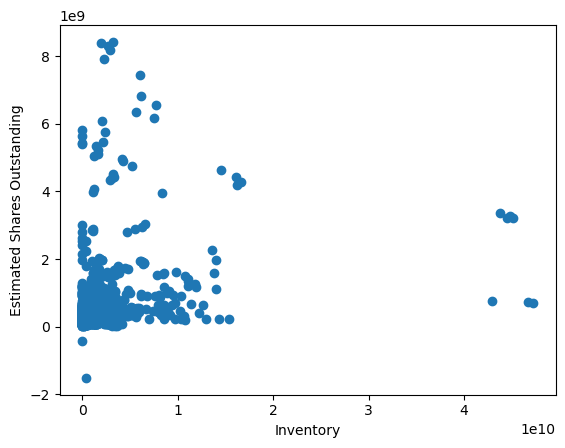

In [18]:
# Plotting scatterplot of Investments verus Estimated Shares Outstanding
plt.scatter(fundamentals_df['Inventory'], fundamentals_df['Estimated Shares Outstanding'])
plt.xlabel('Inventory')
plt.ylabel('Estimated Shares Outstanding')
plt.show()

There's no clear linear relationship visible between Inventory and Estimated Shares Outstanding.

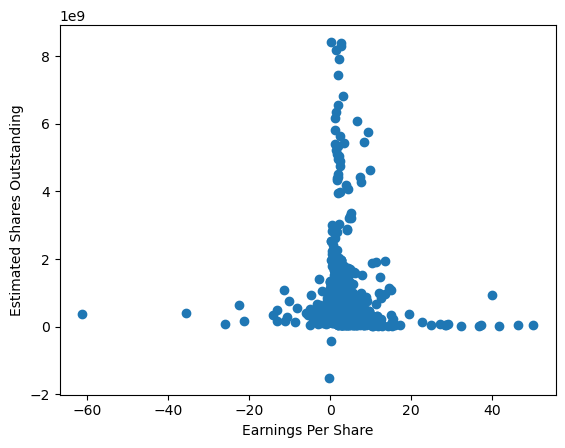

In [19]:
# Plotting scatterplot of Earnings Per Share verus Estimated Shares Outstanding
plt.scatter(fundamentals_df['Earnings Per Share'], fundamentals_df['Estimated Shares Outstanding'])
plt.xlabel('Earnings Per Share')
plt.ylabel('Estimated Shares Outstanding')
plt.show()

No clear linear trend or correlation could be determined.

Finally, plot a bar plot of average Estimated Shares Outstanding of top 10 tickers. 

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_28924/2055563495.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ESO = fundamentals_df.groupby(fundamentals_df['Ticker Symbol']).mean()['Estimated Shares Outstanding']


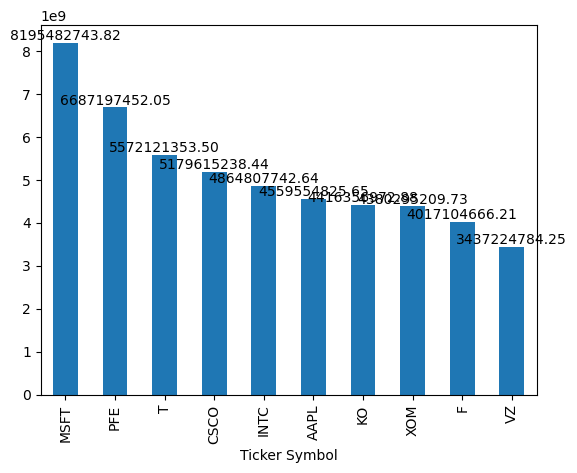

In [20]:
# Compute mean ESO for each Ticker Symbol
mean_ESO = fundamentals_df.groupby(fundamentals_df['Ticker Symbol']).mean()['Estimated Shares Outstanding']

# Sort values in decending order and filter top 10 tickers to plot a bar plot
mean_ESO_top10 = mean_ESO.sort_values(ascending=False)[:10]

# plot a bar plot
mean_ESO_top10.plot.bar()
for i, v in enumerate(mean_ESO_top10):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

"MSFT" has the highest average Estimated Shares Outstanding in this dataset, with just 8 billion shares outstanding on average. 

/var/folders/qk/cp6vzsf56nsb8yd0n4typwx00000gn/T/ipykernel_28924/2810123435.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_ESO2 = fundamentals_df.groupby(fundamentals_df['For Year']).mean()['Estimated Shares Outstanding']


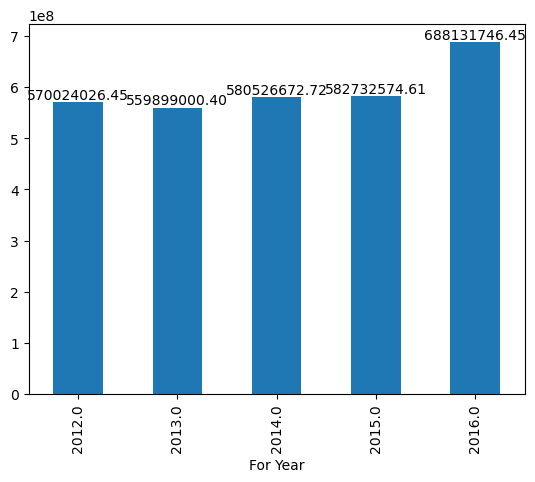

In [21]:
# Compute mean ESO for each year
mean_ESO2 = fundamentals_df.groupby(fundamentals_df['For Year']).mean()['Estimated Shares Outstanding']

# plot a bar plot
mean_ESO2.plot.bar()
for i, v in enumerate(mean_ESO2):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

There is a general upward trend observed in the average Estimated Shares Outstanding from 2012 through 2016 with some fluctuations. The highest average ESO is in 2016, at approximately 688M.

#### 2. Linear Regression Model Development: Create linear regression to predict Estimated Shares Outstanding. Explain your model. (15 pts)

In [56]:
# Define Dependent and Independent variables
y = 'Estimated Shares Outstanding' # Estimated Shares Outstanding = dependent variable
cols_drop = [y,'Ticker Symbol', 'Period Ending'] # Columns to drop(first 3 columns)
X = fundamentals_df.columns.drop(cols_drop) # Everything else = independent variables

In [57]:
# Create a formula to avoid enumerate all the independent variables
formula = f'Q("{y}") ~ ' + ' + '.join(['Q("' + var + '")' for var in X])

# Run the multiple linear regression model
linear_model1 = smf.ols(formula=formula, data=fundamentals_df).fit()

linear_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                   
=============================================================================================
Dep. Variable:     Q("Estimated Shares Outstanding")   R-squared:                       0.854
Model:                                           OLS   Adj. R-squared:                  0.846
Method:                                Least Squares   F-statistic:                     99.92
Date:                               Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                       21:14:46   Log-Likelihood:                -27506.
No. Observations:                               1299   AIC:                         5.516e+04
Df Residuals:                                   1226   BIC:                         5.554e+04
Df Model:                                         72                                         
Covariance Type:                           nonrobust                                         
============================================================================================================================
                                                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Intercept                                                 2.009e+10   2.02e+10      0.993      0.321   -1.96e+10    5.98e+10
Q("Accounts Payable")                                     -179.9800    238.818     -0.754      0.451    -648.517     288.557
Q("Accounts Receivable")                                    -0.0709      0.057     -1.252      0.211      -0.182       0.040
Q("Add'l income/expense items")                              0.0383      0.057      0.674      0.501      -0.073       0.150
Q("After Tax ROE")                                       -6.956e+05   5.01e+05     -1.389      0.165   -1.68e+06    2.87e+05
Q("Capital Expenditures")                                    0.9453      2.395      0.395      0.693      -3.753       5.644
Q("Capital Surplus")                                         0.0147      0.009      1.620      0.105      -0.003       0.033
Q("Cash Ratio")                                           7.175e+05   3.84e+05      1.869      0.062   -3.57e+04    1.47e+06
Q("Cash and Cash Equivalents")                              -1.2331      0.617     -2.000      0.046      -2.443      -0.024
Q("Changes in Inventories")                                 -0.0868      0.060     -1.445      0.149      -0.205       0.031
Q("Common Stocks")                                          -0.0014      0.010     -0.147      0.883      -0.020       0.018
Q("Cost of Revenue")                                      1.082e+06   1.09e+06      0.993      0.321   -1.06e+06    3.22e+06
Q("Current Ratio")                                       -1.985e+05   2.94e+05     -0.675      0.500   -7.75e+05    3.78e+05
Q("Deferred Asset Charges")                                 -0.0589      0.989     -0.060      0.953      -1.998       1.881
Q("Deferred Liability Charges")                              0.0091      0.099      0.092      0.927      -0.185       0.203
Q("Depreciation")                                           -0.0832      0.057     -1.468      0.142      -0.194       0.028
Q("Earnings Before Interest and Tax")                       22.8807     39.507      0.579      0.563     -54.628     100.389
Q("Earnings Before Tax")                                   -23.2061     39.506     -0.587      0.557    -100.713      54.301
Q("Effect of Exchange Rate")                                -0.0474      0.167     -0.284      0.777      -0.375       0.281
Q("Equity Earnings/Loss Unconsolidated Subsidiary")          0.1119      0.082      1.372      0.170      -0.048       0.272
Q("Fixed Assets")                          

- The R-squared value is `0.854`, suggesting that approximately 85.4% of the variance in the Estimated Shares Outstanding can be explained by the independent variables(all columns except for the first 3 columns and the dependent variable) in the model.
- Global F-test: the p-vlaue "Prob (F-statistic)" is 0.00 indicates that at least some of the independent variables are significantly related to the dependent variable and overall model is valid. 
- While there are some independent variables significant at 5% significance level such as Cash and Cash Equivalents, Income Tax, Inventory, Misc. Stocks, Net Borrowings, Net Cash Flows-Financing, Net Receivables,Net Receivables, Operating Income, Other Current Assets, Other Financing Activities, Pre-Tax Margin, Research and Development, Sale and Purchase of Stock, Short-Term Investments, and Earnings Per Share, most of the variables are statistically insignificant. This is a strong evidence of multicollinearity(Model is overally significant but too few significant coefficient), and in order to correctly estimate the model's coefficients, this problem must be addressed.

#### 3. Multicollinearity in Linear Regression: Explain how multicollinearity can affect the interpretation of a linear regression model's coefficients. (Written) (10 pts)

While multicollinearity is not a problem when the objective of model is to making prediction, it is a big problem when trying to interpret the coefficients. There're several ways thatr multicollinearity affect the interpretation of coefficients. 

First, multicollinearity can lead to larger standard errors for the coefficients of the correlated variables. This increased variability makes it harder to detect statistically significant effects. Even if a variable is seems to be influential, multicollinearity can make it seem statistically insignificant. Also, when multicollinearity is present, changes in one predictor are connected with changes in another, and this makes us difficult to determine the exact contribution of each individual variable to the dependent variable. 

Additionally, multicollinearity can lead to confusing signs and magnitudes of coefficients. For example, in this model, despite the scatterplot in Question 1 suggesting positive coefficients for the log of Total Equity and Total Liabilities, multicollinearity results in negative slope coefficients for these variables, contrary to initial expectations.

 This phenomenon indicates that when multicollinearity is present, determining the specific contribution of each independent variable becomes challenging. Consequently, generalizing the model is more difficult, leading to the risk of overfitting. This means the model might fit the training data well but perform poorly with new data.

#### 4. P-Value Analysis and Histogram: Create a histogram of the p-values. Is there any skewedness? Provide your explanation. (10 pts)

In [58]:
# Extract p-values from the model
pvalues = linear_model1.pvalues
print(pvalues)

Intercept                          3.210730e-01
Q("Accounts Payable")              4.512168e-01
Q("Accounts Receivable")           2.107671e-01
Q("Add'l income/expense items")    5.006590e-01
Q("After Tax ROE")                 1.650397e-01
                                       ...     
Q("Total Liabilities & Equity")    3.210731e-01
Q("Total Revenue")                 3.210732e-01
Q("Treasury Stock")                4.297303e-01
Q("For Year")                      3.271361e-01
Q("Earnings Per Share")            6.988095e-27
Length: 76, dtype: float64


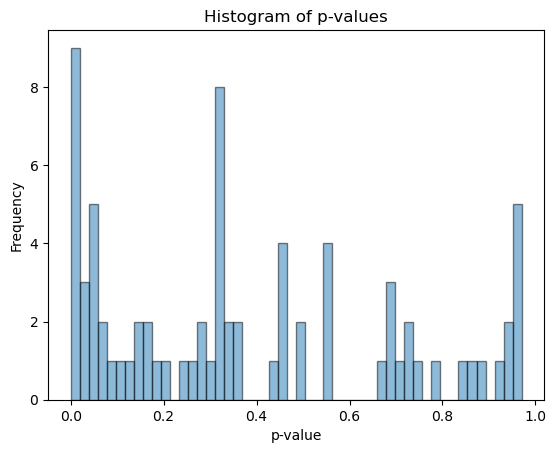

In [59]:
plt.hist(pvalues, bins = 50, edgecolor='black', alpha=0.5) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

In this histogram, we observe that the distribution of p-values is not uniform and has multiple peaks. Generally, we expect a uniform distribution of p-values if the null hypothesis holds true across all tests. Although somewhat subtle, the graph appears to be right-skewed, with a notable concentration of p-values near 0 which can be interpreted as evidence against the null hypothesis. The histogram suggests that some coefficients are statistically significant(more than 50% at a 5% significance level) while others are not.

#### 5. False Discovery Rate Control with BH Procedure: Given the p values you find, use the BH procedure to control the FDR with a q of 0.1. How many “true” discoveries do you estimate? (15 pts)

In [60]:
# Set parameters
q = 0.1
N = len(pvalues)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues)

# Find the last p-value that is below the FDR threshold
below_threshold = sorted_pvals <= fdr_threshold
below_threshold # Looks like there are 7 true discoveries

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [61]:
# Count the number of true discoveries(p-values below threshold)
true_discoveries = sum(below_threshold)

# Extract Alpha, max value of true discoveries
max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
alpha = sorted_pvals[max_index]

# Print the results
print(f"Alpha: {alpha}")
print(f"True discoveries: {true_discoveries}")

Alpha: 0.0015730576156550995
True discoveries: 7


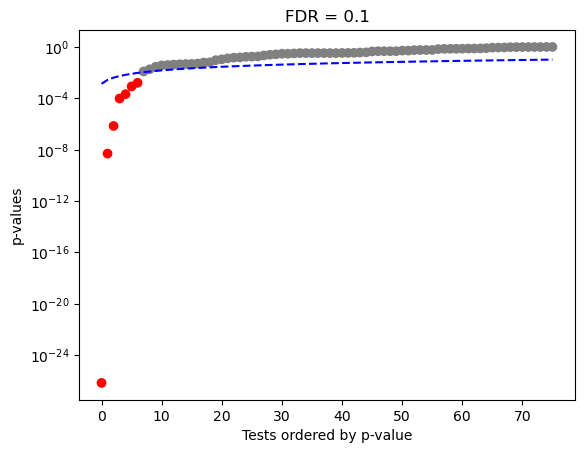

In [62]:
# Plot
plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()
  

There are 7 true discoveries.

#### 6. Sensitivity Analysis of FDR Control: If you apply the BH procedure at different q values, how do the results change? What does this tell you about the robustness of your significant variables? (10 pts)

Use the same code with question #5 but make changes in q only.

Alpha: 0.0002042039478126777
True discoveries: 5


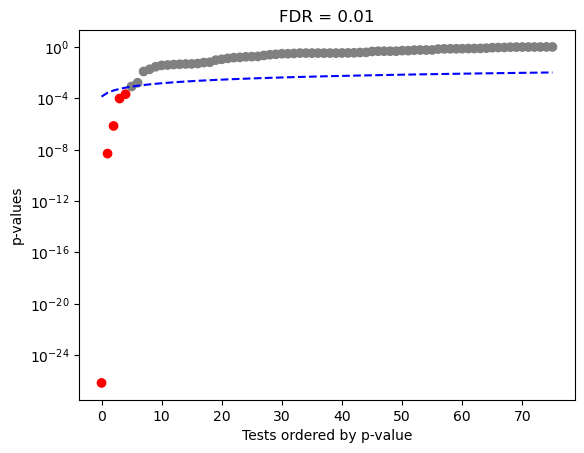

In [63]:
# Set parameters
q = 0.01 # q = 0.01
N = len(pvalues)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues)

# Find the last p-value that is below the FDR threshold
below_threshold = sorted_pvals <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries = sum(below_threshold)

# Extract Alpha, max value of true discoveries
max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
alpha = sorted_pvals[max_index]

# Print the results
print(f"Alpha: {alpha}")
print(f"True discoveries: {true_discoveries}")

# Plot
plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()

Alpha: 0.0015730576156550995
True discoveries: 7


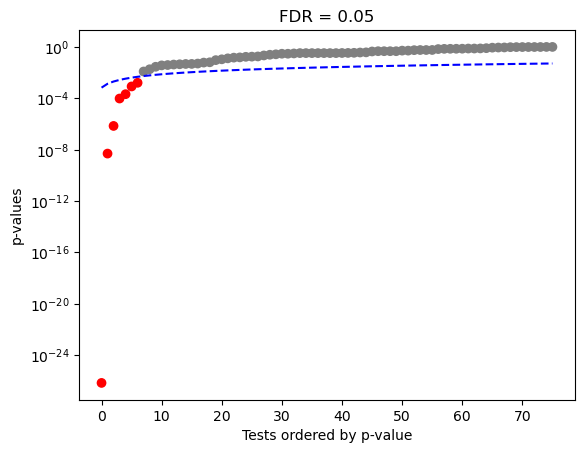

In [64]:
# Set parameters
q = 0.05 # q = 0.05
N = len(pvalues)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues)

# Find the last p-value that is below the FDR threshold
below_threshold = sorted_pvals <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries = sum(below_threshold)

# Extract Alpha, max value of true discoveries
max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
alpha = sorted_pvals[max_index]

# Print the results
print(f"Alpha: {alpha}")
print(f"True discoveries: {true_discoveries}")

# Plot
plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()

Alpha: 0.17660200448398147
True discoveries: 26


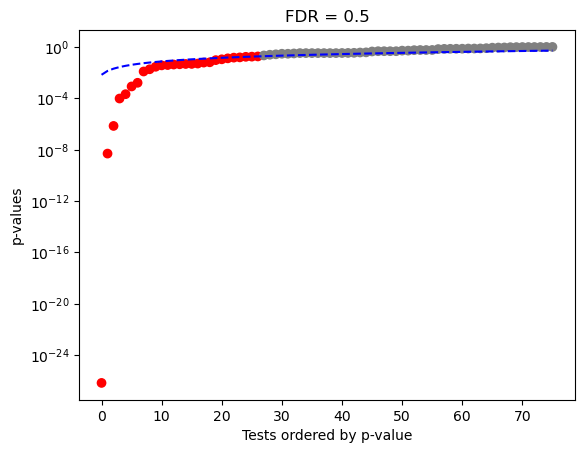

In [65]:
# Set parameters
q = 0.5 # q = 0.5
N = len(pvalues)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues)

# Find the last p-value that is below the FDR threshold
below_threshold = sorted_pvals <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries = sum(below_threshold)

# Extract Alpha, max value of true discoveries
max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
alpha = sorted_pvals[max_index]

# Print the results
print(f"Alpha: {alpha}")
print(f"True discoveries: {true_discoveries}")

# Plot
plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()

Alpha: 0.5625886323963902
True discoveries: 56


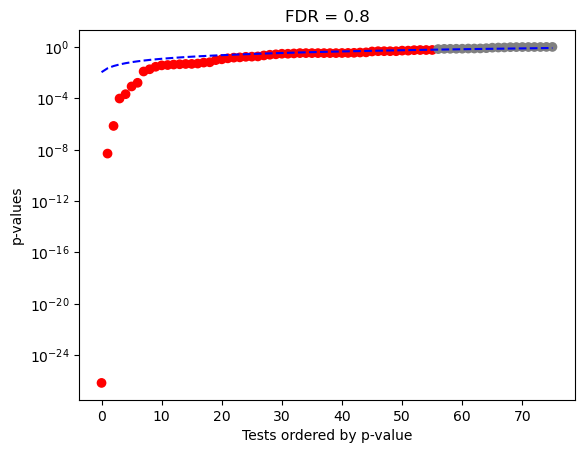

In [32]:
# Set parameters
q = 0.8 # q = 0.8
N = len(pvalues)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues)

# Find the last p-value that is below the FDR threshold
below_threshold = sorted_pvals <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries = sum(below_threshold)

# Extract Alpha, max value of true discoveries
max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
alpha = sorted_pvals[max_index]

# Print the results
print(f"Alpha: {alpha}")
print(f"True discoveries: {true_discoveries}")

# Plot
plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()

Results
- The number of true discoveries when q = 0.01 is 5, and alpha = 0.00020
- The number of true discoveries when q = 0.05 is 7 and alpha = 0.001573
- The number of true discoveries when q = 0.10 is 7 and alpha = 0.001573
- The number of true discoveries when q = 0.50 is 26 and alpha = 0.176602
- The number of true discoveries when q = 0.80 is 56 and alpha = 0.56259

As the q values increase, the number of significant variables (true discoveries) also increases. If the number of true discoveries changes only slightly with a considerable increase in q value, this suggests that the significant variables are robust.

In this case, as the q value increases from 0.01 to 0.05, the number of true discoveries increases by only two. For q values from 0.05 to 0.1, the number of true discoveries remains the same. However, when the q value exceeds 0.1, the number of true discoveries increases significantly. For example, at q = 0.5, there are 26 significant variables, and 56 at q = 0.8. In conclusion, there is robustness in the significant variables where the q value is below 0.1.

#### 7. Exploring Interaction Terms: (10pts, 5 pts for each) 

##### a. Expand your linear regression model by adding interaction terms. Create interaction terms between pairs of predictors (up to quadratic terms, i.e., terms of power two). You should include both original predictors and their interaction terms in your model. 

In [66]:
fundamentals_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1299 entries, 0 to 1779
Data columns (total 78 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Ticker Symbol                                        1299 non-null   object 
 1   Period Ending                                        1299 non-null   object 
 2   Accounts Payable                                     1299 non-null   float64
 3   Accounts Receivable                                  1299 non-null   float64
 4   Add'l income/expense items                           1299 non-null   float64
 5   After Tax ROE                                        1299 non-null   float64
 6   Capital Expenditures                                 1299 non-null   float64
 7   Capital Surplus                                      1299 non-null   float64
 8   Cash Ratio                                           1299 non-null  

In [67]:
X2 = fundamentals_df.iloc[:,2:27] # Slice the dataset so that we can use only first 25 variables
X2.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5.496000e+09,4.616000e+09,0.0,0.0,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,2.249000e+09
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,6.579150e+08,6.240740e+08,0.0,0.0,1.292547e+09,7.638900e+07,50.0,3.098036e+09,2.364040e+08,2.884500e+07


In [68]:
y = fundamentals_df.iloc[:,77]
y.head()

0    3.350000e+08
1    1.630222e+08
2    7.169154e+08
3    6.681299e+08
4    7.328355e+07
Name: Estimated Shares Outstanding, dtype: float64

In [69]:
# Create interaction terms with PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X2)
X_poly.shape
#X_poly

(1299, 350)

In [70]:
# Add column names 
new_colnames = poly_features.get_feature_names_out(X2.columns)
new_colnames.shape

(350,)

In [71]:
df_poly = pd.DataFrame(X_poly, columns=new_colnames)
df_poly.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Gross Margin^2,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit^2,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax^2,Income Tax Intangible Assets,Intangible Assets^2
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14


In [73]:
# Run the multiple linear regression model
y = y.reset_index(drop=True) # Resetting indices to address indices error
df_poly = df_poly.reset_index(drop=True)

X = sm.add_constant(df_poly) # Add constant
linear_model2 = sm.OLS(y,X).fit()
linear_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  21:16:34   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               0.0003      0.000      1.342      0.180      -0.000       0.001
Accounts Payable                                                                   -0.0753      0.046     -1.653      0.099      -0.165       0.014
Accounts Receivable                                                                -0.5266      0.285     -1.850      0.065      -1.085       0.032
Add'l income/expense items                                                          0.0584      0.277      0.211      0.833      -0.485       0.602
After Tax ROE                                                                       0.0010      0.001      0.754      0.451      -0.002       0.004
Capital Expenditures                                                                0.0195      0.097      0.202      0.840      -0.170       0.209
Capital Surplus                                                                     0.0556      0.021      2.667      0.008       0.015       0.097
Cash Ratio                                                                          0.0002      0.000      0.470      0.638      -0.001       0.001
Cash and Cash Equivalents                                                          -0.0240      0.059     -0.406      0.685      -0.140       0.092
Changes in Inventories                                                             -0.1546      0.481     -0.321      0.748      -1.098       0.789
Common Stocks                                                                      -0.0115      0.050     -0.233      0.816      -0.109       0.086
Cost of Revenue                                                                    -0.0081      0.009     -0.890      0.373      -0.026       0.010
Current Ratio                                                                       0.0010      0.001      1.548      0.122      -0.000       0.002
Deferred Asset Charges                                                              0.2450      0.121      2.020      0.044       0.007       0.483
Deferred Liability Charges                                                         -0.0359      0.059     -0.607      0.544      -0.152       0.080
Depreciation                                                                        0.0534      0.151      0.353      0.724      -0.244       0.351
Earnings Before Interest and Tax                                                    0.4119      0.302      1.365      0.172      -0.180       1.004
Earnings Befo

##### b. Briefly explain why interaction terms might be important in the context of predicting Estimated Shares Outstanding using fundamental financial metrics.

Interaction term can be crucial in context of predicting ESO. For instance, the interaction term of Accounts Payable:Cost of Revenue(p-value: 0.005, coef: -2.518e-12) can let us know the company's ability to manage its payables impacts its cost structure and subsequently, its financing decisions. A high Cost of Revenue with increasing Accounts Payable might signal cash flow issues, potentially leading to changes in shares outstanding. 

Another example is Accounts Payable:Gross Profit (p-value: 0.004, coef: 8.698e-12). This interaction can show us how effective revenue collection (Accounts Receivable) combined with profitability (Gross Profit) influences a company's need for external financing. High receivables with low gross profit might indicate a need for more equity financing.

Also, the relationship between Capital Expenditures:Cash Ratio(p-value: 0.006, coef: 0.0026) can be important. Briefly speaking, capital expenditures refers to a company's investments and Cash Ratio is conpany's liquidity. A company with high capital expenditures but liquidity might be more likely to increase shares outstanding to raise funds.

In essence, by including interaction terms that combine these fundamental financial metrics, a predictive model can more accurately reflect the complex interplay of financial conditions and decisions that influence a company's Estimated Shares Outstanding.

#### 8. Model Evaluation with Interaction Terms: (10pts, 5 pts for each) 

##### c. Evaluate the performance of this new model with interaction terms. Compare it with the performance of the original model without interaction terms using appropriate metrics. 

In [74]:
print(f"Original model R-squared: {round(linear_model1.rsquared,2)}")
print(f"Revised model R-squared: {round(linear_model2.rsquared,2)}")

Original model R-squared: 0.85
Revised model R-squared: 0.94


- The R-squared of the original model is 0.85, indicating that approximately 85% of the variance in Estimated Shares Outstanding is explained by the independent variables in the model. 
- The R-squared of the revised model, which includes interaction terms, is 0.94. This suggests that about 94% of the variance in Estimated Shares Outstanding is explained by the 25 variables, 300 interaction terms, and 25 squared variables in the model.
- Therefore, we can conclude that the overall performance of the revised model is better. The p-value of 0.00 for both models indicates that both of them are statistically significant. However, the model with the interaction terms demonstrates superior performance judging from the R-squared values.


##### d. Discuss any significant changes in the model's performance or the coefficients of the predictors.

There are some coefficients whose p-values have become both significant and insignificant. In the first case, where the p-value decreased from above 0.05 to below 0.05, are Accounts Receivable, Capital Surplus, Goodwill, and Intangible Assets. These variables initially had high p-values in the original model. However, after including the interaction terms, their p-values decreased to below 0.05. On the other hand, there are variables which used to have significant p-values, but exhibited dramatic increase in the revised model. Examples of these include Cash and Cash Equivalents and Income Tax. 

The reason behind this change in p-values is due to the redistribution of explanatory power stemming from the inclusion of interaction terms. In essence, variables that were significant independently might lose significance if their effects are better explained through interactions with other variables, or vice versa.

Also, there are some variables whose coefficient signs have switched, including After Tax ROE, Cost of Revenue, Current Ratio, Deferred Asset Charges, Depreciation, Fixed Assets, Goodwill, and Gross Margin. This can be attributed to interaction effects, implying that the inclusion of interaction terms can change the direction of the relationship between independent and dependent variables.




#### 9. FDR Analysis with Interaction Terms: (10pts) 

##### a. Create a histogram of the p-values for the new model including interaction terms. Discuss any noticeable differences from the histogram you created for the original model. (3pts)

In [75]:
# Extract p-values from the model
pvalues2 = linear_model2.pvalues
print(pvalues2)

const                             0.179861
Accounts Payable                  0.098587
Accounts Receivable               0.064618
Add'l income/expense items        0.833014
After Tax ROE                     0.451161
                                    ...   
Gross Profit Income Tax           0.247168
Gross Profit Intangible Assets    0.395808
Income Tax^2                      0.693931
Income Tax Intangible Assets      0.024529
Intangible Assets^2               0.003350
Length: 351, dtype: float64


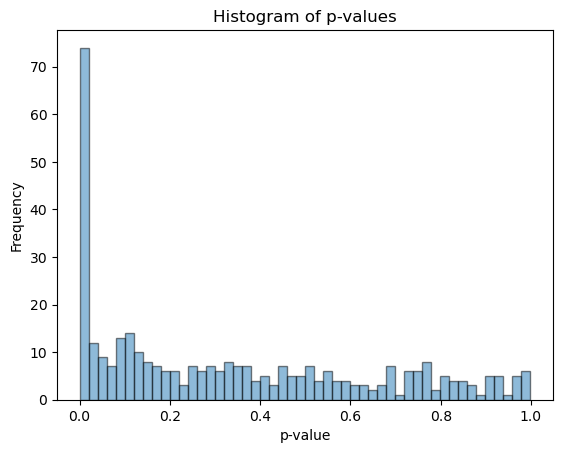

In [76]:
plt.hist(pvalues2, bins = 50, edgecolor='black', alpha=0.5) # set the histrogram
# set value, x, y labels
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")
plt.show() # this will print the histrogram

The histogram of p-values from the new model with interaction terms shows a significant peak at 0.0. 
This indicates that there are more significant coefficients compared to the previous model without any interaction terms, which exhibited several peaks.

##### b. Apply the Benjamini-Hochberg (BH) procedure to control the False Discovery Rate (FDR) with a q-value of 0.1. How many significant predictors are identified now, including both main effects and interaction effects? (5pts)

In [77]:
# Set parameters
q = 0.1
N = len(pvalues2)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals2 = np.sort(pvalues2)

# Find the last p-value that is below the FDR threshold
below_threshold2 = sorted_pvals2 <= fdr_threshold

In [78]:
# Count the number of true discoveries(p-values below threshold)
true_discoveries2 = sum(below_threshold2)

# Extract Alpha, max value of true discoveries
max_index2 = np.max(np.where(below_threshold2)) if np.any(below_threshold2) else 0
alpha2 = sorted_pvals2[max_index2]

# Print the results
print(f"Alpha: {alpha2}")
print(f"True discoveries: {true_discoveries2}")

Alpha: 0.018488280187803664
True discoveries: 74


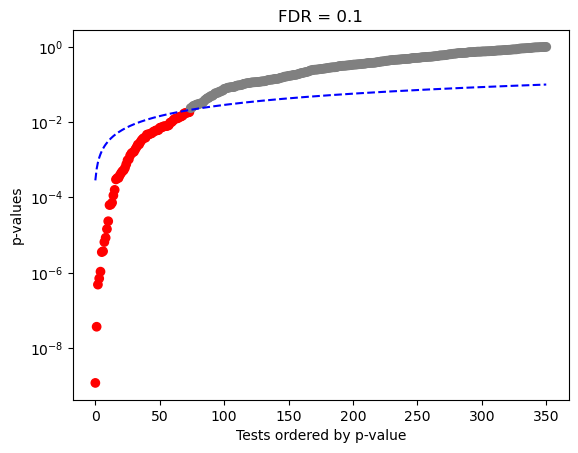

In [79]:
# Plot
plt.scatter(range(N), sorted_pvals2, c=np.where(sorted_pvals2 <= alpha2, 'red', 'grey'), marker='o')
plt.yscale('log')
plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
plt.xlabel("Tests ordered by p-value")
plt.ylabel("p-values")
plt.title(f"FDR = {q}")
plt.show()

Now there are 74 true discoveries in total.

##### c. Compare these results with those obtained from the original model. Discuss the impact of including interaction terms on the number of discoveries and the control of the FDR. (2pts)

In [80]:
# FDR control

# Set parameters
q = 0.01 # q = 0.01
N = len(pvalues2)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues2)

# Find the last p-value that is below the FDR threshold
below_threshold2 = sorted_pvals2 <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries2 = sum(below_threshold2)

# Extract Alpha, max value of true discoveries
max_index2 = np.max(np.where(below_threshold2)) if np.any(below_threshold2) else 0
alpha2 = sorted_pvals2[max_index2]

# Print the results
print(f"Alpha: {alpha2}")
print(f"True discoveries: {true_discoveries2}")

Alpha: 0.0006114423436161905
True discoveries: 24


In [81]:
# Set parameters
q = 0.05 # q = 0.05
N = len(pvalues2)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues2)

# Find the last p-value that is below the FDR threshold
below_threshold2 = sorted_pvals2 <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries2 = sum(below_threshold2)

# Extract Alpha, max value of true discoveries
max_index2 = np.max(np.where(below_threshold2)) if np.any(below_threshold2) else 0
alpha2 = sorted_pvals2[max_index2]

# Print the results
print(f"Alpha: {alpha2}")
print(f"True discoveries: {true_discoveries2}")

Alpha: 0.007989936541149642
True discoveries: 55


In [82]:
# Set parameters
q = 0.50 # q = 0.50
N = len(pvalues2)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues2)

# Find the last p-value that is below the FDR threshold
below_threshold2 = sorted_pvals2 <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries2 = sum(below_threshold2)

# Extract Alpha, max value of true discoveries
max_index2 = np.max(np.where(below_threshold2)) if np.any(below_threshold2) else 0
alpha2 = sorted_pvals2[max_index2]

# Print the results
print(f"Alpha: {alpha2}")
print(f"True discoveries: {true_discoveries2}")

Alpha: 0.23881233408292235
True discoveries: 169


In [83]:
# FDR control

# Set parameters
q = 0.80 # q = 0.80
N = len(pvalues2)
k = np.arange(1, N+1)
fdr_threshold = (q * k) / N # p-value cut-offs

# Rank the p-values, smallest to largest
sorted_pvals = np.sort(pvalues2)

# Find the last p-value that is below the FDR threshold
below_threshold2 = sorted_pvals2 <= fdr_threshold

# Count the number of true discoveries(p-values below threshold)
true_discoveries2 = sum(below_threshold2)

# Extract Alpha, max value of true discoveries
max_index2 = np.max(np.where(below_threshold2)) if np.any(below_threshold2) else 0
alpha2 = sorted_pvals2[max_index2]

# Print the results
print(f"Alpha: {alpha2}")
print(f"True discoveries: {true_discoveries2}")

Alpha: 0.6166877043833783
True discoveries: 274


##### (1) True Discoveries

- Original model 

  . At q = 0.10, 7 true discoveries

- Revised model 
  . At q  = 0.10, 74 true discoveries

##### (2) FDR Control
- Original model 

  . The number of true discoveries when q = 0.01 is 5, and alpha = 0.00020

  . The number of true discoveries when q = 0.05 is 7 and alpha = 0.001573

  . The number of true discoveries when q = 0.10 is 7 and alpha = 0.001573

  . The number of true discoveries when q = 0.50 is 26 and alpha = 0.176602

  . The number of true discoveries when q = 0.80 is 56 and alpha = 0.56259

- Revised model 

  . The number of true discoveries when q = 0.01 is 24, and alpha = 0.0006114

  . The number of true discoveries when q = 0.05 is 55 and alpha = 0.0079899

  . The number of true discoveries when q = 0.10 is 74 and alpha = 0.018488

  . The number of true discoveries when q = 0.50 is 169 and alpha = 0.23881
  
  . The number of true discoveries when q = 0.80 is 274 and alpha = 0.6166877

The revised model consistantly identifies more true discoveries across all levels of q values. This indicates that the inclusion of interaction terms greatly enhances the model's capacity to detect significant effects. It also suggests that the interaction terms are indeed capturing important relationships within the data that the original model failed to detect.